In [194]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf 
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from statsmodels.tsa.stattools import adfuller
from sklearn import linear_model
from statsmodels.graphics.tsaplots import plot_predict
from pandas import datetime
from matplotlib import pyplot
import math
import statsmodels.tsa.api as smt
from scipy import stats
import scipy
import statistics
%matplotlib inline
import sys
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf

In [78]:
SP500 = yf.download("^GSPC", start = '2012-6-17', end = '2022-6-18')
BAC = yf.download("BAC", start = '2012-6-17', end = '2022-6-18')

SP500 = SP500.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
BAC = BAC.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)

data = pd.merge(BAC, SP500, on = 'Date', how = 'left').dropna()
data = data.rename(columns = {'Adj Close_x' : 'BAC Adj Close'})
data = data.rename(columns = {'Adj Close_y' : 'SP500 Adj Close'})
data = data.reset_index()
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,BAC Adj Close,SP500 Adj Close
0,2012-06-18,6.661012,1344.780029
1,2012-06-19,6.961444,1357.979980
2,2012-06-20,6.987196,1355.689941
3,2012-06-21,6.712514,1325.510010
4,2012-06-22,6.815520,1335.020020
...,...,...,...
2513,2022-06-13,32.020000,3749.629883
2514,2022-06-14,31.459999,3735.479980
2515,2022-06-15,32.049999,3789.989990
2516,2022-06-16,31.850000,3666.770020


In [23]:
data

,Date,BAC Adj Close,SP500 Adj Close
0,2012-06-18,6.661011,1344.780029
1,2012-06-19,6.961442,1357.979980
2,2012-06-20,6.987195,1355.689941
3,2012-06-21,6.712514,1325.510010
4,2012-06-22,6.815518,1335.020020
...,...,...,...
2513,2022-06-13,32.020000,3749.629883
2514,2022-06-14,31.459999,3735.479980
2515,2022-06-15,32.049999,3789.989990
2516,2022-06-16,31.850000,3666.770020


In [79]:
#Transform the Adj Close into Log Returns 

data['SnP500_Log_Return'] = 100 * np.log(data['SP500 Adj Close'] / data['SP500 Adj Close'].shift(1))

data['BAC_Log_Return'] = 100 * np.log(data['BAC Adj Close'] / data['BAC Adj Close'].shift(1))
data = data.dropna()

In [58]:
data

,Date,BAC Adj Close,SP500 Adj Close,SnP500_Log_Return,BAC_Log_Return
1,2012-06-19,6.961443,1357.979980,0.976783,4.411568
2,2012-06-20,6.987195,1355.689941,-0.168778,0.369228
3,2012-06-21,6.712514,1325.510010,-2.251321,-4.010552
4,2012-06-22,6.815517,1335.020020,0.714899,1.522838
5,2012-06-25,6.523671,1313.719971,-1.608350,-4.376471
...,...,...,...,...,...
2513,2022-06-13,32.020000,3749.629883,-3.953993,-3.528508
2514,2022-06-14,31.459999,3735.479980,-0.378082,-1.764385
2515,2022-06-15,32.049999,3789.989990,1.448706,1.858029
2516,2022-06-16,31.850000,3666.770020,-3.305221,-0.625977


In [80]:
#In Sample 
data_in_sample = data.loc[:1936]

#Evaluation
data_evaluation = data.loc[1937:]

In [112]:
data_in_sample.tail()

,Date,BAC Adj Close,SP500 Adj Close,SnP500_Log_Return,BAC_Log_Return
1932,2020-02-24,30.942717,3225.889893,-3.408808,-4.860113
1933,2020-02-25,29.382818,3128.209961,-3.074790,-5.172755
1934,2020-02-26,28.957388,3116.389893,-0.378570,-1.458472
1935,2020-02-27,27.539301,2978.760010,-4.516814,-5.021126
1936,2020-02-28,26.943705,2954.219971,-0.827246,-2.186443


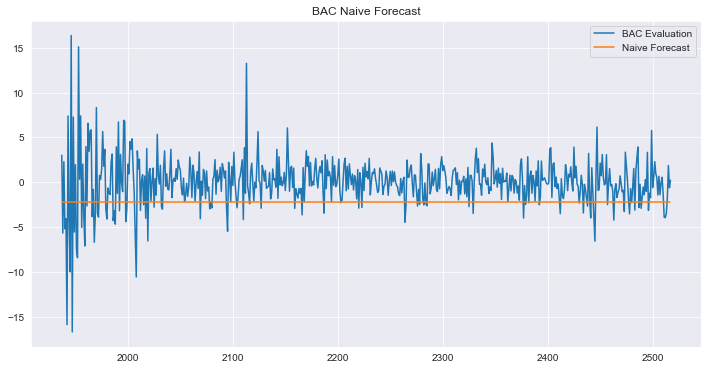

In [84]:
in_sample_array = np.array(data_in_sample['BAC_Log_Return'])
y_hat = data_evaluation.copy()
y_hat["Naive Forecast"] = in_sample_array[len(in_sample_array) - 1]
plt.figure(figsize = (12,6))
plt.plot(data_evaluation['BAC_Log_Return'], label = 'BAC Evaluation')
plt.plot(y_hat['Naive Forecast'], label = 'Naive Forecast')
plt.legend(loc = 'best')
plt.title("BAC Naive Forecast")
plt.show()

In [89]:
#Naive Model mean

y_hat["Naive Forecast"].mean()

-2.186443404886318

In [90]:
data_in_sample['BAC_Log_Return'].mean()

0.07218379625041937

# sss

In [12]:
regAR_1_train = data_in_sample[['Date','BAC_Log_Return','SnP500_Log_Return']].copy().dropna()
regAR_1_test = data_evaluation[['Date','BAC_Log_Return','SnP500_Log_Return']].copy().dropna()

regAR_1_train

,Date,BAC_Log_Return,SnP500_Log_Return
1,2012-06-19,4.411553,0.976783
2,2012-06-20,0.369221,-0.168778
3,2012-06-21,-4.010566,-2.251321
4,2012-06-22,1.522908,0.714899
5,2012-06-25,-4.376527,-1.608350
...,...,...,...
1932,2020-02-24,-4.860102,-3.408808
1933,2020-02-25,-5.172743,-3.074790
1934,2020-02-26,-1.458459,-0.378570
1935,2020-02-27,-5.021146,-4.516814


In [13]:
#Creating Market Lag 
regAR_1_train['BAC_Lag_Return'] = regAR_1_train['BAC_Log_Return'].shift()
regAR_1_test['BAC_Lag_Return'] = regAR_1_test['BAC_Log_Return'].shift()

regAR_1_train['SnP500_Lag_Return'] = regAR_1_train['SnP500_Log_Return'].shift()
regAR_1_test['SnP500_Lag_Return'] = regAR_1_test['SnP500_Log_Return'].shift()

regAR_1_train = regAR_1_train.dropna()
regAR_1_test = regAR_1_test.dropna()


regAR_1_train

,Date,BAC_Log_Return,SnP500_Log_Return,BAC_Lag_Return,SnP500_Lag_Return
2,2012-06-20,0.369221,-0.168778,4.411553,0.976783
3,2012-06-21,-4.010566,-2.251321,0.369221,-0.168778
4,2012-06-22,1.522908,0.714899,-4.010566,-2.251321
5,2012-06-25,-4.376527,-1.608350,1.522908,0.714899
6,2012-06-26,0.262812,0.476137,-4.376527,-1.608350
...,...,...,...,...,...
1932,2020-02-24,-4.860102,-3.408808,-1.416024,-1.057381
1933,2020-02-25,-5.172743,-3.074790,-4.860102,-3.408808
1934,2020-02-26,-1.458459,-0.378570,-5.172743,-3.074790
1935,2020-02-27,-5.021146,-4.516814,-1.458459,-0.378570


In [16]:
regAR_1 = ARIMA(endog = regAR_1_train['BAC_Log_Return'], exog = regAR_1_train['SnP500_Lag_Return'], order = (1,0,0))
reg_results = regAR_1.fit()
print(reg_results.summary())

                               SARIMAX Results                                
Dep. Variable:         BAC_Log_Return   No. Observations:                 1935
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3674.336
Date:                Wed, 10 Aug 2022   AIC                           7356.672
Time:                        12:10:37   BIC                           7378.944
Sample:                             0   HQIC                          7364.863
                               - 1935                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0707      0.039      1.818      0.069      -0.006       0.147
SnP500_Lag_Return    -0.0194      0.052     -0.372      0.710      -0.122       0.083
ar.L1                 0.

In [25]:
np.reshape

AttributeError: 'DataFrame' object has no attribute 'reshape'

<AxesSubplot:>

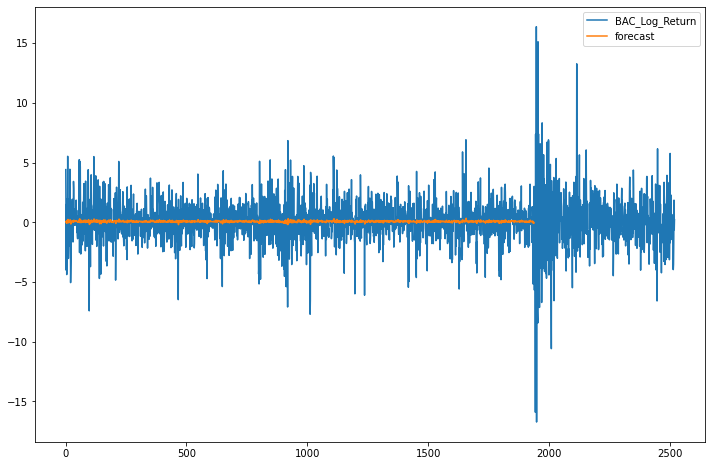

In [35]:
data['forecast'] = reg_results.predict(exog = regAR_1_train['SnP500_Lag_Return'], start = 0, end = 1934, dynamic = False)
data[['BAC_Log_Return','forecast']].plot(figsize=(12,8))

In [ ]:
CAPM model 

In [131]:
#Download Treasury Bill Data
risk_free = yf.download("^IRX", start='2012-6-17', end='2022-6-18')
risk_free = risk_free.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
risk_free = risk_free.dropna()
risk_free

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2012-06-18,0.075
2012-06-19,0.090
2012-06-20,0.080
2012-06-21,0.075
2012-06-22,0.075
...,...
2022-06-13,1.498
2022-06-14,1.743
2022-06-15,1.695


In [132]:
#Transform Data
risk_free['Risk_Free'] = 100/360 * np.log(1 + risk_free['Adj Close'])
risk_free = risk_free.dropna()
risk_free

,Adj Close,Risk_Free
Date,,
2012-06-18,0.075,0.020089
2012-06-19,0.090,0.023938
2012-06-20,0.080,0.021378
2012-06-21,0.075,0.020089
2012-06-22,0.075,0.020089
...,...,...
2022-06-13,1.498,0.254303
2022-06-14,1.743,0.280292
2022-06-15,1.695,0.275388


In [133]:
#merge data sets 
capm = pd.merge(data, risk_free, on = 'Date', how = 'left')
capm = capm.dropna()
capm = capm.rename(columns = {'Adj Close_x' : 'BAC Adj Close'})
capm = capm.rename(columns = {'Adj Close_y' : 'SP500 Adj Close'})


In [94]:
capm.tail()

,Date,BAC Adj Close,SP500 Adj Close,SnP500_Log_Return,BAC_Log_Return,Adj Close,Risk_Free
2512,2022-06-13,32.020000,3749.629883,-3.953993,-3.528508,1.498,0.254303
2513,2022-06-14,31.459999,3735.479980,-0.378082,-1.764385,1.743,0.280292
2514,2022-06-15,32.049999,3789.989990,1.448706,1.858029,1.695,0.275388
2515,2022-06-16,31.850000,3666.770020,-3.305221,-0.625977,1.483,0.252630
2516,2022-06-17,31.920000,3674.840088,0.219845,0.219538,1.510,0.255634


In [134]:
#Generate market risk premium and BAC excess returns 
capm['BAC Excess Return'] = capm['BAC_Log_Return'] - capm['Risk_Free']
capm['Market Risk Premium'] = capm['SnP500_Log_Return'] - capm['Risk_Free']
capm = capm.replace([np.inf, -np.inf], np.nan)
capm = capm.dropna()
display(capm)

,Date,BAC Adj Close,SP500 Adj Close,SnP500_Log_Return,BAC_Log_Return,Adj Close,Risk_Free,BAC Excess Return,Market Risk Premium
0,2012-06-19,6.961444,1357.979980,0.976783,4.411553,0.090,0.023938,4.387615,0.952845
1,2012-06-20,6.987196,1355.689941,-0.168778,0.369242,0.080,0.021378,0.347864,-0.190156
2,2012-06-21,6.712514,1325.510010,-2.251321,-4.010579,0.075,0.020089,-4.030668,-2.271410
3,2012-06-22,6.815520,1335.020020,0.714899,1.522880,0.075,0.020089,1.502791,0.694810
4,2012-06-25,6.523671,1313.719971,-1.608350,-4.376506,0.075,0.020089,-4.396595,-1.628439
...,...,...,...,...,...,...,...,...,...
2512,2022-06-13,32.020000,3749.629883,-3.953993,-3.528508,1.498,0.254303,-3.782810,-4.208296
2513,2022-06-14,31.459999,3735.479980,-0.378082,-1.764385,1.743,0.280292,-2.044678,-0.658374
2514,2022-06-15,32.049999,3789.989990,1.448706,1.858029,1.695,0.275388,1.582641,1.173317
2515,2022-06-16,31.850000,3666.770020,-3.305221,-0.625977,1.483,0.252630,-0.878606,-3.557851


In [141]:
#split the capm into train and test

capm_train = capm[:1934]
capm_test = capm[1935:]



In [142]:
#############TEST#############################
Y_test = capm_train['BAC Excess Return']
X_test = capm_train['Market Risk Premium']

X_test = sm.add_constant(X_test)
CAPM_BAC_test = sm.OLS(Y_test,X_test).fit()
predictions_test = CAPM_BAC_test.predict()
CAPM_BAC_Summary_test = (CAPM_BAC_test.summary())
print(CAPM_BAC_Summary_test)

                            OLS Regression Results                            
Dep. Variable:      BAC Excess Return   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     1755.
Date:                Thu, 11 Aug 2022   Prob (F-statistic):          2.22e-273
Time:                        14:06:09   Log-Likelihood:                -3060.4
No. Observations:                1934   AIC:                             6125.
Df Residuals:                    1932   BIC:                             6136.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0589    

In [145]:
X_new = capm_test['Market Risk Premium']
Y_test = capm_test['BAC Excess Return']
ynewpred = CAPM_BAC_test.predict(X_new)  # predict out of sample
print(ynewpred)

ValueError: shapes (1,580) and (2,) not aligned: 580 (dim 1) != 2 (dim 0)

In [135]:
Y = capm['BAC Excess Return']
X = capm['Market Risk Premium']

X = sm.add_constant(X)
CAPM_BAC = sm.OLS(Y,X).fit()
predictions = CAPM_BAC.predict()
CAPM_BAC_Summary = (CAPM_BAC.summary())
print(CAPM_BAC_Summary)

                            OLS Regression Results                            
Dep. Variable:      BAC Excess Return   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     2726.
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:04:01   Log-Likelihood:                -4330.8
No. Observations:                2515   AIC:                             8666.
Df Residuals:                    2513   BIC:                             8677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0404    

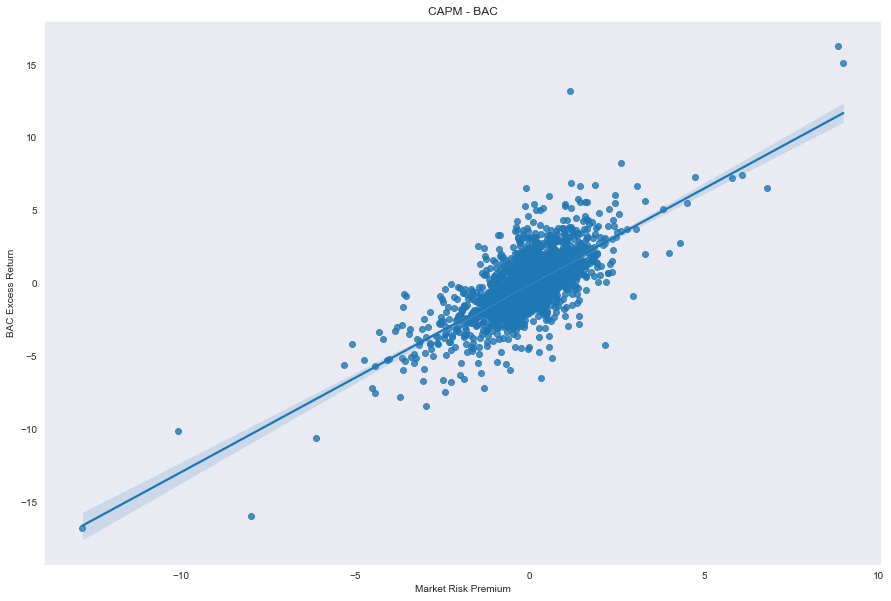

In [136]:
#plot the BAC returns with the market premium return 
fig, CAPM_plot = plt.subplots()
fig.set_size_inches(15, 10)
sns.set_style('darkgrid')
plt.title("CAPM - BAC")
plt.grid()
CAPM_plot = sns.regplot(x = 'Market Risk Premium', y = 'BAC Excess Return', data = capm)

In [139]:
#predictions for the evaluation set
capm_prediction_test = predictions[1934:]

#the actual excess returns for evaluation period 
actual_capm_exreturn = capm[1934:]

In [140]:
#RMSE
MSE = mean_squared_error(actual_capm_exreturn['BAC Excess Return'], capm_prediction_test)
RMSFE = math.sqrt(MSE)

#RMAE
MAE = mean_absolute_error(actual_capm_exreturn['BAC Excess Return'], capm_prediction_test)
RMAFE = math.sqrt(MAE)

print("Root Mean Square Forecast Error: " + str(RMSFE))
print("Root Mean Absolute Forecast Error: " + str(RMAFE))

Root Mean Square Forecast Error: 1.8203365967129785
Root Mean Absolute Forecast Error: 1.1644937341016006


In [162]:
#GARCH(1,1)

model_1 = arch_model(data_in_sample['BAC_Log_Return'], mean = 'Constant', vol = 'GARCH', p = 1, q = 1)
garch11 = model_1.fit(disp = 'off')
garch11

                     Constant Mean - GARCH Model Results                      
Dep. Variable:         BAC_Log_Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3610.63
Distribution:                  Normal   AIC:                           7229.27
Method:            Maximum Likelihood   BIC:                           7251.54
                                        No. Observations:                 1936
Date:                Thu, Aug 11 2022   Df Residuals:                     1935
Time:                        17:02:50   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0988  3.358e-02      2.944  3.244e-03 [3.303e-0

In [163]:
#GJR-GARCH(1,1)

model_2 = arch_model(data_in_sample['BAC_Log_Return'], mean = 'Constant', p = 1, o = 1, q = 1, vol = 'GARCH')
gjr_garch11 = model_2.fit(disp = 'off')
print(gjr_garch11.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:         BAC_Log_Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -3597.70
Distribution:                  Normal   AIC:                           7205.41
Method:            Maximum Likelihood   BIC:                           7233.25
                                        No. Observations:                 1936
Date:                Thu, Aug 11 2022   Df Residuals:                     1935
Time:                        17:03:17   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0754  3.332e-02      2.264  2.360e-02 [1.012e-0

In [164]:
#EGARCH(1,0) 

model_3 = arch_model(data_in_sample['BAC_Log_Return'], mean = 'Constant', vol = 'EGARCH', p = 1, o = 0, q = 0)
egarch10 = model_3.fit(disp = 'off')
egarch10

                     Constant Mean - EARCH Model Results                      
Dep. Variable:         BAC_Log_Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      EARCH   Log-Likelihood:               -3652.87
Distribution:                  Normal   AIC:                           7311.75
Method:            Maximum Likelihood   BIC:                           7328.45
                                        No. Observations:                 1936
Date:                Thu, Aug 11 2022   Df Residuals:                     1935
Time:                        17:03:32   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0805  3.541e-02      2.272  2.306e-02 [1.107e-0

# Part 3 

In [160]:
#get the sample SD for all data 

ssd = statistics.stdev(data['BAC_Log_Return'])
ssd

1.9489544519365458

In [256]:
#data['BAC_Log_Return'].expanding(min_periods = 2)

print(data_in_sample['BAC_Log_Return'].expanding(min_periods = 2).sum())

1              NaN
2         4.780795
3         0.770215
4         2.293096
5        -2.083410
           ...    
2513    157.008934
2514    155.244549
2515    157.102578
2516    156.476601
2517    156.696140
Name: BAC_Log_Return, Length: 2517, dtype: float64


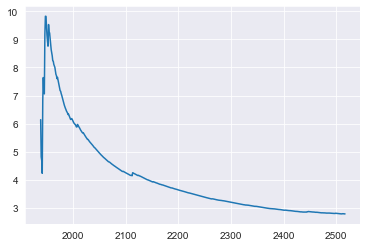

In [297]:
rolling_window = data_evaluation['BAC_Log_Return'].expanding(min_periods = 2).std()
plt.plot(rolling_window)

In [288]:
model = arch_model(data_evaluation['BAC_Log_Return'], mean = 'zero', vol = 'GARCH', p = 1, q = 1)
x_1 = model.fit(disp = 'off')
x_1

                       Zero Mean - GARCH Model Results                        
Dep. Variable:         BAC_Log_Return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                      GARCH   Log-Likelihood:               -1282.46
Distribution:                  Normal   AIC:                           2570.91
Method:            Maximum Likelihood   BIC:                           2584.00
                                        No. Observations:                  581
Date:                Thu, Aug 11 2022   Df Residuals:                      581
Time:                        22:29:55   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1583      0.118      1.336      0.181 [-7.38

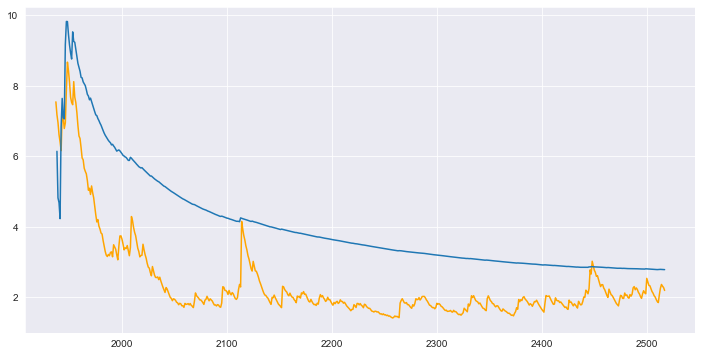

In [298]:
con_vol1 = x_1.conditional_volatility
con_vol1.plot(figsize = (12,6), color = 'orange', label = 'GARCH(1,1)')
plt.plot(rolling_window)

In [318]:
# Start location set to going back with a half year of trading days
start_loc = 0

# Window of 60 days
end_loc = start_loc + 1936

forecasts={}

for i in range(2517):

    # Fit with fixed rolling window
    gjrgarch_fixed_rolling_result = model_2.fit(first_obs = i + start_loc, 
                                              last_obs = i + end_loc, 
                                              update_freq = 5,
                                              disp='off')
    
    # 1-period variance forecast and save the result
    temp_result = gjrgarch_fixed_rolling_result.forecast(horizon = 1).variance
    fcast = temp_result.iloc[i + end_loc]
    forecasts[fcast.name] = fcast

# Create dataframe, transpose to get dates as rows and variance as column     
forecast_var_fixed = pd.DataFrame(forecasts).T

IndexError: single positional indexer is out-of-bounds

In [341]:
rolling_predictions = []
test_size = len(data_evaluation)

In [342]:
for i in range (test_size):
    train = data['BAC_Log_Return'][:-(test_size - i)]
    predict_10 = statistics.stdev(train)
    rolling_predictions_sd.append(predict_10)

Text(0.5, 1.0, 'Rolling SD Forecast')

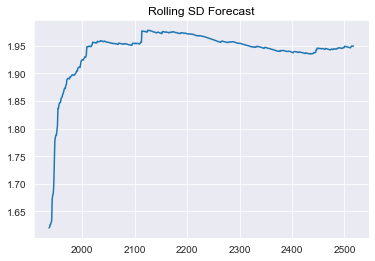

In [346]:
rolling_predictions = pd.Series(rolling_predictions, index = data_evaluation['BAC_Log_Return'].index[-test_size:])
plt.plot(rolling_predictions)
plt.title('Rolling SD Forecast', color = 'black')

In [348]:
#lt.plot(rolling_predictions_sd)

In [ ]:
#RMSE
MSE = mean_squared_error(, rolling_predictions_sd)
RMSFE = math.sqrt(MSE)

#RMAE
MAE = mean_absolute_error(, capm_prediction_test)
RMAFE = math.sqrt(MAE)

print("Root Mean Square Forecast Error: " + str(RMSFE))
print("Root Mean Absolute Forecast Error: " + str(RMAFE))

In [331]:
len(data_in_sample)

1936

In [344]:
rolling25_pred = []
length = len(data_in_sample)

for i in range (test_size):
    train_data = data['BAC_Log_Return'][-(length + i - 25):(length + i)]
    predict_1 = statistics.stdev(train_data)
    rolling25_pred.append(predict_1)

Text(0.5, 1.0, '25 Day Rolling SD Forecast')

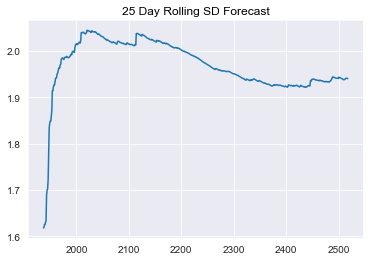

In [347]:
rolling_pred_25 = pd.Series(rolling25_pred, index = data_evaluation['BAC_Log_Return'].index[-length:])
plt.plot(rolling25_pred)
plt.title('25 Day Rolling SD Forecast', color = 'black')

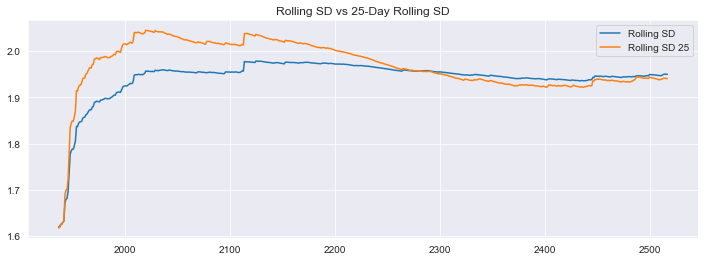

In [374]:
plt.figure(figsize=(12,4))
plt.plot(rolling_predictions_sd, label = 'Rolling SD')
plt.plot(rolling_pred_25, label = 'Rolling SD 25')
plt.title('Rolling SD vs 25-Day Rolling SD')
plt.legend(loc = 'best')

In [354]:
#GARCH(1,1)
model = arch_model(data_evaluation['BAC_Log_Return'], mean = 'zero', vol = 'GARCH', p = 1, q = 1)
x_1 = model.fit(disp = 'off')
x_1

                       Zero Mean - GARCH Model Results                        
Dep. Variable:         BAC_Log_Return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                      GARCH   Log-Likelihood:               -1282.46
Distribution:                  Normal   AIC:                           2570.91
Method:            Maximum Likelihood   BIC:                           2584.00
                                        No. Observations:                  581
Date:                Fri, Aug 12 2022   Df Residuals:                      581
Time:                        10:27:49   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1583      0.118      1.336      0.181 [-7.38

In [355]:
ewma = model.fix([0, 0.06, 0.94])
print(ewma.summary())

                           Zero Mean - GARCH Model Results                           
Dep. Variable:                BAC_Log_Return   R-squared:                          --
Mean Model:                        Zero Mean   Adj. R-squared:                     --
Vol Model:                             GARCH   Log-Likelihood:               -1292.96
Distribution:                         Normal   AIC:                           2591.92
Method:            User-specified Parameters   BIC:                           2605.01
                                               No. Observations:                  581
Date:                       Fri, Aug 12 2022                                         
Time:                               10:28:01                                         
   Volatility Model  
                 coef
---------------------
omega          0.0000
alpha[1]       0.0600
beta[1]        0.9400

Results generated with user-specified parameters.
Std. errors not available when the model is

In [363]:
model = arch_model(data_evaluation['BAC_Log_Return'], mean = 'Constant', vol = 'GARCH', p = 1, o = 1, q = 1)
x_2 = model.fit(disp = 'off')
x_2

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:         BAC_Log_Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1275.21
Distribution:                  Normal   AIC:                           2560.42
Method:            Maximum Likelihood   BIC:                           2582.24
                                        No. Observations:                  581
Date:                Fri, Aug 12 2022   Df Residuals:                      580
Time:                        10:34:50   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0536  8.016e-02      0.669      0.504 [ -0.103,  0.21

In [385]:
model = arch_model(data_evaluation['BAC_Log_Return'], mean = 'Zero', vol = 'EGARCH', p = 1, o = 0, q = 0)
x_3 = model.fit(disp = 'off')
x_3

                       Zero Mean - EARCH Model Results                        
Dep. Variable:         BAC_Log_Return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                      EARCH   Log-Likelihood:               -1357.34
Distribution:                  Normal   AIC:                           2718.69
Method:            Maximum Likelihood   BIC:                           2727.42
                                        No. Observations:                  581
Date:                Fri, Aug 12 2022   Df Residuals:                      581
Time:                        12:30:22   Df Model:                            0
                            Volatility Model                            
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.8780      0.131     14.301  2.162e-46 [  1.621,  2.13

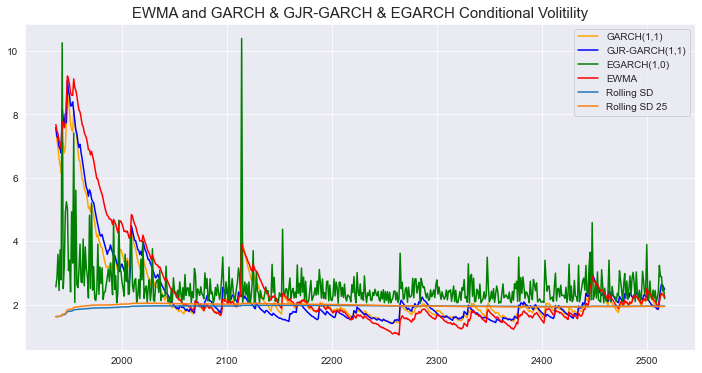

In [386]:
con_vol1 = x_1.conditional_volatility
gjr_garch_con_vol = x_2.conditional_volatility
egarch_con_vol = x_3.conditional_volatility

#get ewma conditional vol
ewma_con_vol1 = ewma.conditional_volatility

#plot the ewma curve with other GARCH
con_vol1.plot(figsize = (12,6), color = 'orange', label = 'GARCH(1,1)')
gjr_garch_con_vol.plot(figsize = (12,6), color = 'blue', label = 'GJR-GARCH(1,1)')
egarch_con_vol.plot(figsize = (12,6), color = 'green', label = 'EGARCH(1,0)')
ewma_con_vol1.plot(figsize = (12,6), color = 'red', label = 'EWMA')
plt.plot(rolling_predictions_sd, label = 'Rolling SD')
plt.plot(rolling_pred_25, label = 'Rolling SD 25')
plt.title('EWMA and GARCH & GJR-GARCH & EGARCH Conditional Volitility', size = 15)
plt.legend(loc = 'best')
plt.show()

In [390]:
#RMSFE Value
print("Rolling SD")
print("GARCH(1,1) RMSFE:", np.sqrt(mean_squared_error(rolling_predictions_sd, con_vol1)))
print("GJR-GARCH(1,1) RMSFE:", np.sqrt(mean_squared_error(rolling_predictions_sd, gjr_garch_con_vol)))
print("EGARCH(1,0) RMSFE:", np.sqrt(mean_squared_error(rolling_predictions_sd, egarch_con_vol)))
print("EWMA RMSFE:", np.sqrt(mean_squared_error(rolling_predictions_sd, ewma_con_vol1)))

Rolling SD
GARCH(1,1) RMSFE: 1.3838966438196938
GJR-GARCH(1,1) RMSFE: 0.961071392563468
EGARCH(1,0) RMSFE: 1.5040303942649873
EWMA RMSFE: 1.8074922721453914


In [391]:
print("25 Day Rolling SD")
print("GARCH(1,1) RMSFE:", np.sqrt(mean_squared_error(rolling_pred_25, con_vol1)))
print("GJR-GARCH(1,1) RMSFE:", np.sqrt(mean_squared_error(rolling_pred_25, gjr_garch_con_vol)))
print("EGARCH(1,0) RMSFE:", np.sqrt(mean_squared_error(rolling_pred_25, egarch_con_vol)))
print("EWMA RMSFE:", np.sqrt(mean_squared_error(rolling_pred_25, ewma_con_vol1)))


25 Day Rolling SD
GARCH(1,1) RMSFE: 1.3605113743998931
GJR-GARCH(1,1) RMSFE: 0.9391003339397206
EGARCH(1,0) RMSFE: 1.481595649167744
EWMA RMSFE: 1.7792476678639364
